<h1 align="center">House Prices Advanced Regression Techniques Project</h1>


- *By: Mohammed Alsheikh*
- *Github: [Github Link](https://github.com/malsheikcomp)*
- *LinkedIn: [LinkedIn Link](https://www.linkedin.com/in/021517/)*

<h1 align="right">Kaggle Competition</h1>

### Table of Contents
* [Chapter 1: Introduction](#intro)
* [Chapter 2: Exploratory Data Analysis](#EDA)
* [Chapter 3: Feature Selection](#fs)
* [Chapter 4: Model Training and Performance](#mtp)
* [Chapter 5: Submission](#sub)
* [Chapter 6: Conclusion](#conc)

## Introduction <a class="anchor" id="intro"></a>

*This project refers to [Project Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) where we are tasked with predicting the sale price of houses.*

1. The competition asks a home buyer to describe their dream house.
2. This dataset proves that a lot more than the number of bedrooms or other basic features that go in to settling a price negotiation.
3. This dataset consists of 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.
4. The Ames Housing dataset was compiled by Dean De Cock for use in data science education.
5. Use creative feature engineering and advanced regression techniques like random forest and gradient boosting.

*Importing a few necessary Libraries*

In [2]:
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns # Seaborn-style plotting
import scipy.stats as stats # probabilistic distributions and statistical operations
import warnings
warnings.filterwarnings('ignore') # allows for our data to look cleaner
import matplotlib.pyplot as plt # Matlab-style plotting
plt.rcParams["figure.figsize"] = (12,6)
%matplotlib inline
print("Completed Importing!")

Completed Importing!


In [3]:
# The code was removed by Watson Studio for sharing.

Data Sources needed is now loaded!!


## Loaded Data

* train_df is the train dataset with the Id column as the index
* test_df is the test dataset with the Id column as the index
* s_sub is the sample submission csv file

## **Data Dictionary can be found below:**


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

## EDA: Exploratory Data Analysis <a class="anchor" id="EDA"></a>

### Performing Analysis on Target Variable 'SalePrice'

<AxesSubplot:title={'center':'House Price Distribution'}, xlabel='SalePrice', ylabel='Density'>

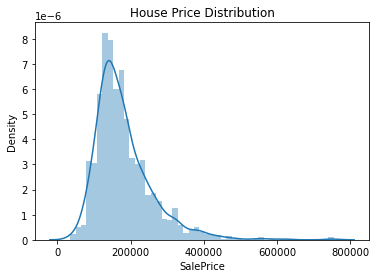

In [24]:
target = train_df['SalePrice']
plt.title("House Price Distribution")
sns.distplot(target)

In [5]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

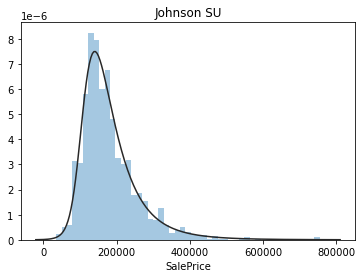

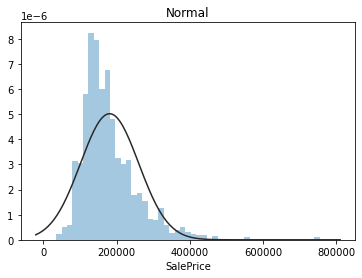

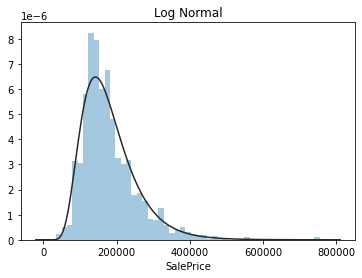

In [6]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(target, kde=False, fit=stats.johnsonsu) # This fits the data best
plt.figure(2); plt.title('Normal')
sns.distplot(target, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(target, kde=False, fit=stats.lognorm)

In [7]:
# Here we can see that the distribution of our target variable is right-skewed

print(f"""Skewness is equal to {target.skew()}
Kurtosis is equal to {target.kurt()}""")

Skewness is equal to 1.8828757597682129
Kurtosis is equal to 6.536281860064529


In [32]:
# Let us observe the top 20 numerical values highly correlated with our target variable

corr_mat = train_df.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(21)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

Correlation:  0.7909816005838053


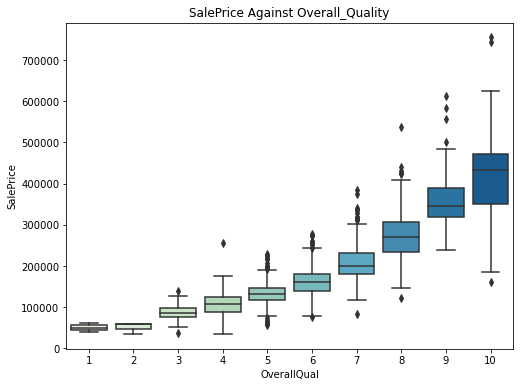

In [20]:
# We can see that Overall quality is the most important feature in our analysis. We observe that there is a linear relationship between the two, the greater the overall quality the higher the saleprice.

print("Correlation: ", train_df[['OverallQual', 'SalePrice']].corr().iloc[1,0])
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, palette='GnBu')
title = plt.title('SalePrice Against Overall_Quality')

Correlation:  0.7086244776126515


<Figure size 720x432 with 0 Axes>

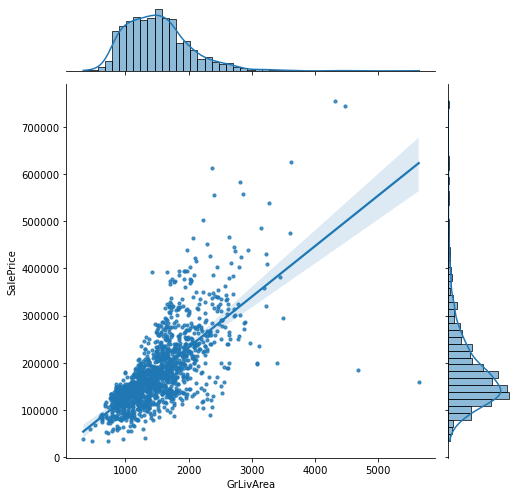

In [40]:
# Living area also has a linear relationship with our target variable. Here we observe some outliers such as the two houses in the lower-right corner. 

    
# Print correlation of two variables

print("Correlation: ", train_df[['GrLivArea', 'SalePrice']].corr().iloc[1, 0])

# Create jointplot of two variables

plt.figure(figsize=(10, 6))
sns.jointplot(train_df['GrLivArea'], 
        train_df['SalePrice'],
        kind='reg',
        height=7,
        scatter_kws={'s': 10},
        marginal_kws={'kde': True})

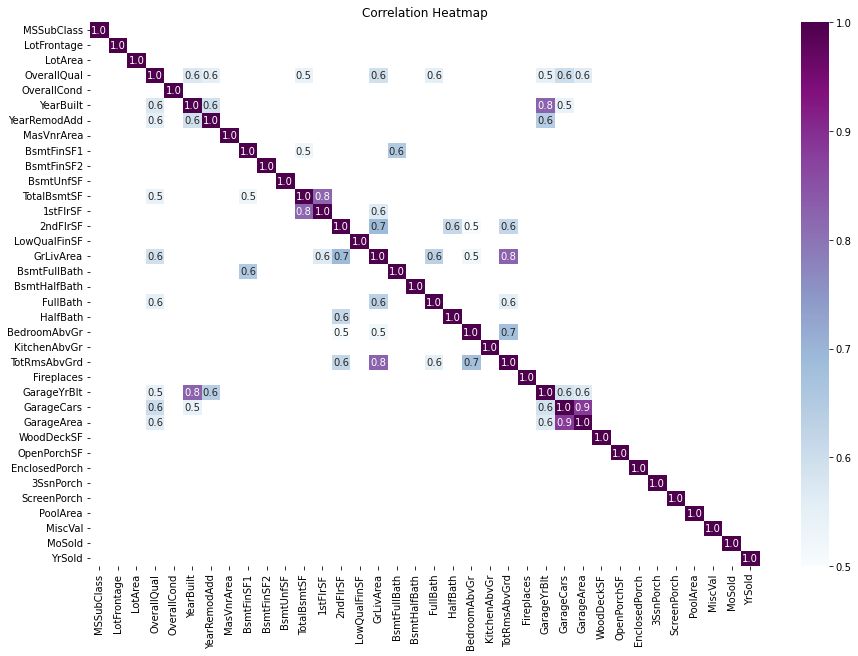

In [42]:
# Create correlation matrix from train data by excluding our target variable

corr_mat = train_df.iloc[:, :-1].corr()

# Allow us to observe the correlations greater than or equal to 0.5

high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot the correlation heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='BuPu',
            vmin=0.5,
            vmax=1)
plt.title('Correlation Heatmap')

There is multicollinearity in our training data. Below features are highly correlated:

- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd
- GarageCars and GarageArea
- GarageYrBlt and YearBuilt

In general multicolliniearity has a negative impact on our prediction models and makes the standard errors of our estimates increase. Due to this for each pair of higly correlated feautures I we will go and remove a feature that has a lower correlation with our target variable.

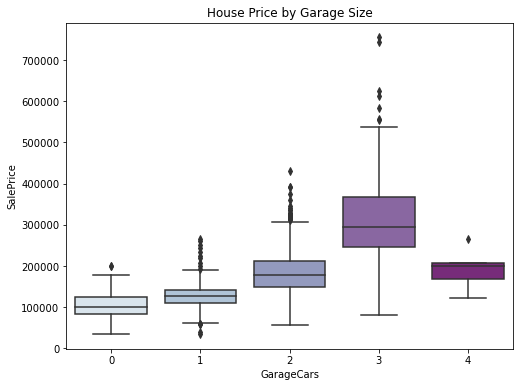

In [20]:
# Garage Size plotted against our target variable presented interesting findings. A garage with 4 cars is cheaper than houses with a garage with 3 cars.

plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_df, palette='BuPu')
plt.title('House Price by Garage Size')

In [60]:
pd.options.display.max_columns = 100  # setting the display in order to visualize all columns in the train dataset.
pd.options.display.max_rows = 3000 # setting the display in order to visualize all rows in the train dataset.

Splitting columns into quantitative and qualitative

In [44]:
qual_train = [g for g in train_df.columns if train_df.dtypes[g] == 'object']
quant_train = [g for g in train_df.columns if train_df.dtypes[g] != 'object']
print("Original number of train qualitative  features:", len(qual_train), "\nOriginal number of train quantitative features:", len(quant_train))
qual_test = [f for f in test_df.columns if test_df.dtypes[f] == 'object']
quant_test = [f for f in test_df.columns if test_df.dtypes[f] != 'object']
print("Original number of test  qualitative  features:", len(qual_test), "\nOriginal number of test  quantitative features:", len(quant_test))

Original number of train qualitative  features: 43 
Original number of train quantitative features: 37
Original number of test  qualitative  features: 43 
Original number of test  quantitative features: 36


In [50]:
rd = [qual_train, quant_train, qual_test, quant_test]
wd = ['qual_train', 'quant_train', 'qual_test', 'quant_test']
for count in range(len(wd)):
    print(wd[count],len(rd[count]),"items :\n", rd[count])
    print()

qual_train 43 items :
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

quant_train 37 items :
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'G

## Outliers

Text(0.5, 1.0, 'SalePrice Against Living_Area')

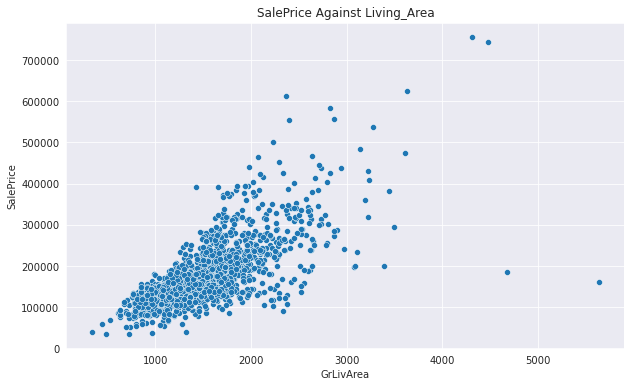

In [53]:
# Regression models in general are very sensitive to outliers and so being vigilant about outliers is important. 

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('SalePrice Against Living_Area')

# There are two observations lying separately from the rest. They have large living area but low price. I will delete these two data points from the training set.

In [54]:
outlier_index = train_df[(train_df.GrLivArea > 4000) & (train_df.SalePrice < 200000)].index
print(train_df.shape)
train_df.drop(outlier_index, axis = 'rows', inplace = True)
print("Outlier two data points removed!")
train_df.shape

(1460, 80)
Outlier two data points removed!


(1458, 80)

In [55]:
# Train data contains the SalePrice variable

x_train = train_df.drop(['SalePrice'], axis = 'columns')
y = train_df['SalePrice']
final_df = pd.concat([x_train, test_df], axis = 'rows')
print ("Train:                 ",x_train.shape[0],"sales and",x_train.shape[1],"features")
print ("Test:                  ",test_df.shape[0],"sales and",test_df.shape[1],"features")
print ("Final DataFrame:       ",final_df.shape[0],"sales and",final_df.shape[1],"features")

Train:                  1458 sales and 79 features
Test:                   1459 sales and 79 features
Final DataFrame:        2917 sales and 79 features


In [61]:
print("Final DataFrame:\nData Types:\n\n",final_df.dtypes)

Final DataFrame:
Data Types:

 MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           o

In [62]:
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [63]:
final_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [34]:
nvals_count = final_df.isnull().sum()
print(nvals_count)
print()
nvals_percent = (final_df.isnull().sum() / len(final_df) ) * 100
missing = pd.DataFrame({
    'Count': nvals_count,
    'Percent': nvals_percent
})
missing = missing[missing.Count > 0]
missing.sort_values(by = 'Count', ascending = False, inplace=True)
print(f"There are {missing.shape[0]} features having missing data.\n")
print("All missing value features:")
missing

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2719
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

,Count,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageCond,159,5.450806
GarageYrBlt,159,5.450806


### Observing The Null Values Visually

[Text(0.5, 15.0, 'Null Items'), Text(33.0, 0.5, 'Count')]

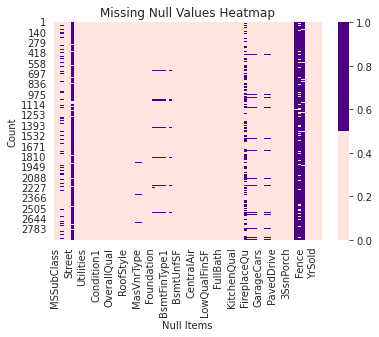

In [35]:
colors = ['mistyrose', 'indigo'] 
sns.set_color_codes("colorblind") # palette to choose from {deep, muted, pastel, dark, bright, colorblind}
plt.title('Missing Null Values Heatmap')
sns.heatmap(final_df.isnull(), cmap=sns.color_palette(colors),).set(xlabel='Null Items', ylabel='Count')
# https://matplotlib.org/stable/gallery/color/named_colors.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://www.codecademy.com/article/seaborn-design-ii

There are 34 features that have missing values. I will however drop four values 'Alley', 'PoolQC', 'Fence', 'MiscFeature' as more than 50% of their data consist of null values.

This means our 30 features will be divided into three groups based on the data description:

Group 1 - Categorical variables where NA means no feature: FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType (11 variables)

For this group I will impute NA with 'None'.

Group 2 - Numerical variables where NA means no feature: GarageArea, GarageCars, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, MasVnrArea (10 variables)

For this group I will impute NA with 0.

Group 3 - Other variables: Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities, LotFrontage, GarageYrBlt (9 variables)

I will impute Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities with their modes, impute LotFrontage with its mean, and impute GarageYrBlt with YearBuilt.

### Dealing with final_df dataset null values

Dropping 'Alley', 'PoolQC', 'Fence', 'MiscFeature'. We are dropping them as more than 50% of their data as null values. We will also drop Id as there is no need for it.

In [65]:
needtodrop = ['Alley','PoolQC','Fence','MiscFeature']
for k in needtodrop:
    final_df.drop([k], axis = 'columns', inplace = True)

In [66]:
from sklearn.impute import SimpleImputer

# Group 1:
group_1 = [
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
final_df[group_1] = final_df[group_1].fillna("None")

# Group 2:
group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

final_df[group_2] = final_df[group_2].fillna(0)

# Group 3:
group_3 = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]

imputer = SimpleImputer(strategy='most_frequent')
final_df[group_3] = pd.DataFrame(imputer.fit_transform(final_df[group_3]), index=final_df.index)

final_df.LotFrontage = final_df.LotFrontage.fillna(final_df.LotFrontage.mean())
final_df.GarageYrBlt = final_df.GarageYrBlt.fillna(final_df.YearBuilt)

In [67]:
# There are no missing values left
final_df.isnull().sum().sum()

0

### Observing The Removed Null Values Visually

[Text(0.5, 15.0, 'Null Items'), Text(33.0, 0.5, 'Count')]

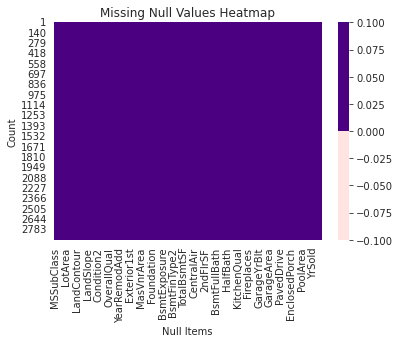

In [68]:
colors = ['mistyrose', 'indigo'] 
sns.set_color_codes("colorblind") # palette to choose from {deep, muted, pastel, dark, bright, colorblind}
plt.title('Missing Null Values Heatmap')
sns.heatmap(final_df.isnull(), cmap=sns.color_palette(colors)).set(xlabel='Null Items', ylabel='Count')

In this step I will create new features from weaker features in the training data. For example, the surface area of each floor has low correlation with house price; however, when we sum them up, the relationship becomes much stronger. In fact, TotalSqFeet becomes the strongest feature in the dataset. The new features I will create are total square feet, total number of bathrooms, age of the house, whether the house was remodeled, and whether the house was sold in the same year it was built.

In [73]:
final_df['totalSqFeet'] = final_df['TotalBsmtSF'] + final_df['1stFlrSF'] + final_df['2ndFlrSF']
final_df['totalBathroom'] = final_df.FullBath + final_df.BsmtFullBath + 0.5 * (final_df.HalfBath + final_df.BsmtHalfBath)
final_df['houseAge'] = final_df.YrSold - final_df.YearBuilt
final_df['reModeled'] = np.where(final_df.YearRemodAdd == final_df.YearBuilt, 0, 1)
final_df['isNew'] = np.where(final_df.YrSold == final_df.YearBuilt, 1, 0)

In [74]:
corr_mat = train_df.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(21)

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
YearRemodAdd    0.507717
GarageYrBlt     0.487156
MasVnrArea      0.482719
Fireplaces      0.469862
BsmtFinSF1      0.409384
LotFrontage     0.370584
WoodDeckSF      0.324758
OpenPorchSF     0.321142
2ndFlrSF        0.320532
HalfBath        0.284590
LotArea         0.268179
Name: SalePrice, dtype: float64

In [75]:
print("Train Shape:",train_df.shape)
print("Test Shape: ",test_df.shape)

Train Shape: (1458, 80)
Test Shape:  (1459, 79)


## Feature Engineering <a class="anchor" id="fs"></a>

In [76]:
from sklearn.preprocessing import LabelEncoder

# Ordinal categorical columns 

label_encoding_cols = [ 
    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "Street", "Utilities"
]

# Apply Label Encoder
label_encoder = LabelEncoder()
for col in label_encoding_cols:
    final_df[col] = label_encoder.fit_transform(final_df[col])
    

# Like YrSold, some numerical variables don't have any ordinal meaning (e.g. MoSold, MSSubClass). I will transform them into categorical variables.

to_factor_cols = ['YrSold', 'MoSold', 'MSSubClass']

for col in to_factor_cols:
    final_df[col] = final_df[col].apply(str)

In [77]:
from scipy import stats
from scipy.stats import norm
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

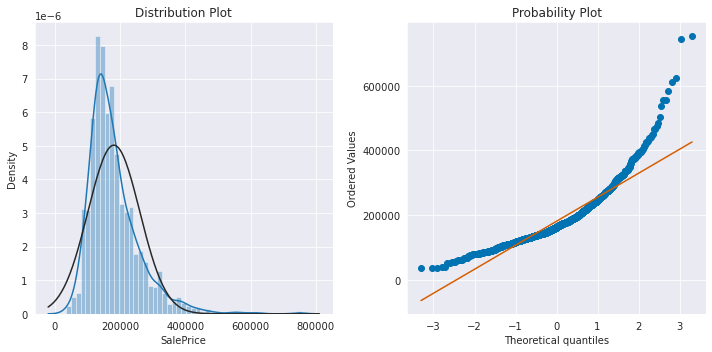

In [78]:
normality_plot(y)

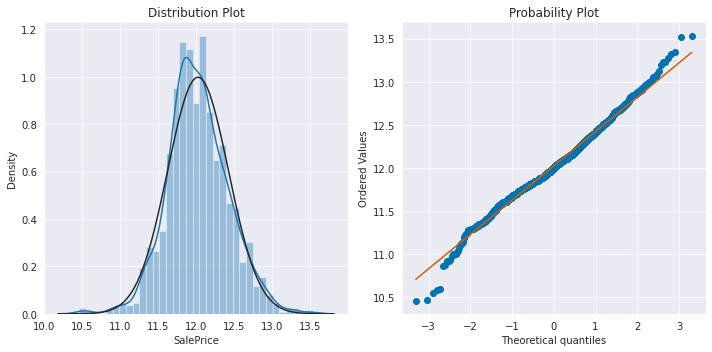

In [79]:
y = np.log(1 + y)
normality_plot(y)

Fixing skewness in other numerical variables

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Below are skewed features in our original train data.

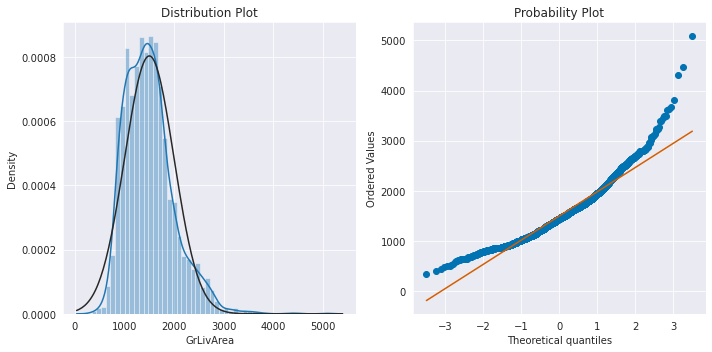

In [80]:
skewness = train_df.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

normality_plot(final_df.GrLivArea)

In [81]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for col in skewed_cols:
    final_df[col] = np.log(1 + final_df[col])

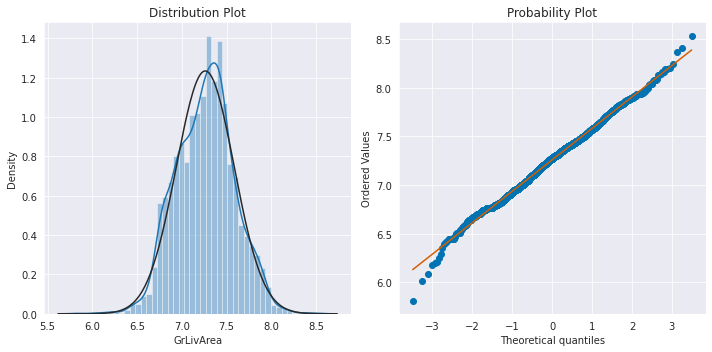

In [82]:
normality_plot(final_df.GrLivArea)

We will get all categorical features in order to convert our text features into numerical values by the use of One Hot Encoding.

In [83]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(final_df.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
final_df[numerical_cols] = scaler.fit_transform(final_df[numerical_cols])

In [84]:
final_df = pd.get_dummies(final_df, drop_first=True)
print("final_df.shape:", final_df.shape)

final_df.shape: (2917, 227)


Dividing our data into train and test data

In [85]:
ntest = len(test_df)
df_train = final_df.iloc[:-ntest, :]
df_test = final_df.iloc[-ntest:, :]
print("Train Shape: ",df_train.shape)
print("Test Shape: ",df_test.shape)

Train Shape:  (1458, 227)
Test Shape:  (1459, 227)


## Model Testing and Predictions <a class="anchor" id="mtp"></a>

In [86]:
# We used log transformation to normalize right-skewed data as big values will be pulled to the center. We use log(1+y) and not log(y) because log(0) is Nan.
from sklearn.model_selection import KFold, cross_val_score
n_folds = 5
def getRMSLE(model):
    """
    Return the average RMSLE over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kfold = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    rmse = np.sqrt(-cross_val_score(
        model, df_train, y, scoring="neg_mean_squared_error", cv=kfold))

    return rmse.mean()

In [87]:
from sklearn.linear_model import Ridge, Lasso

In the regularized linear regression (Ridge), we try to minimize: J(θ) where  λ  is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overall cost J. As the magnitudes of the model parameters  θj  increase, the penalty increases as well. I will find the  λ  that gives me the smallest RMSLE from cross-validation:

Best lambda: 21.0
RMSLE: 0.11380553240469596


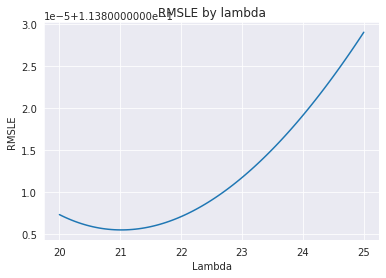

In [88]:
lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())

In [89]:
ridge = Ridge(alpha=21.0)

Best lambda: 0.0006299999999999999
RMSLE: 0.11320808812853497


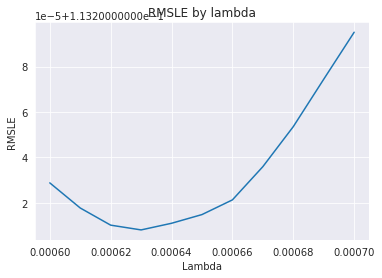

In [90]:
lambda_list = list(np.linspace(0.0006, 0.0007, 11))
rmsle_lasso = [
    getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list
]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

In [91]:
lasso = Lasso(alpha=0.00063, max_iter=100000)

### *Apply LightGBM*

In [92]:
import lightgbm
from lightgbm import LGBMRegressor
clf1 = LGBMRegressor(
    learning_rate=0.05,
    n_estimators=730,
    num_leaves=8,
    min_data_in_leaf=4,
    max_depth=3,
    max_bin=55,
    bagging_fraction=0.78,
    bagging_freq=5,
    feature_fraction=0.24,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_sum_hessian_in_leaf=11)
# clf1.fit(x_train, y)
# clf1_predict = clf1.predict(df_test)
# print(clf1_predict.shape)
getRMSLE(clf1)

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[Ligh

0.1157508017559467

### *Apply Decision Tree Regressor*

In [93]:
from sklearn.tree import DecisionTreeRegressor
clf2 = DecisionTreeRegressor()
# clf2.fit(df_train, y_train)
# clf2_predict = clf2.predict(df_test)
# print(clf2_predict.shape)
getRMSLE(clf2)

0.2057097334933561

### *Apply Random Forest Regressor*

In [94]:
from sklearn.ensemble import RandomForestRegressor
clf3 = RandomForestRegressor()
# clf3.fit(df_train, y)
# clf3_predict = clf3.predict(df_test)
# print(clf3_predict.shape)
getRMSLE(clf3)

0.13858357415208125

Regularized regression and gradient boosting work very differently and they may perform well on different data points. Thus it is a good practice to get average predictions from these models. Below I create a new class for my averaging model.

In [95]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, final_df, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(final_df, y)

        return self

    def predict(self, final_df):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(final_df) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [118]:
avg_model = AveragingModel(models=(ridge, lasso, clf1, clf2, clf3))
my_model = avg_model
my_model.fit(df_train, y)
predictions = my_model.predict(df_test)
final_predictions = np.exp(predictions) - 1
print(final_predictions)
getRMSLE(avg_model)

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[119239.16843288 156433.83865675 183580.02910677 ... 175519.80290561
 114286.927677   215009.05930691]
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] m

0.11854343760848036

## Submission <a class="anchor" id="sub"></a>

In [122]:
output = pd.DataFrame({'Id': test_df.index, 'SalePrice': final_predictions})
output.to_csv('final_submission.csv', index = False)

## Conclusion <a class="anchor" id="conc"></a>

In this project, I have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, I performed data preprocessing and feature engineering. Finally, I train regularized regression models (Ridge, Lasso), and LightGBM, and take average predictions from these models to predict final price of each house. # By the time I write this notebook, my best model has Mean Absolute Error of ..... (12293.919), (ranking ........ (/), approximately top % in the Kaggle leaderboard.